In [1]:
# !pip install miniSom
# Link do chat gpt https://chat.openai.com/share/f18a0505-9e88-437d-9f5f-a0ea85f0ab26

Defaulting to user installation because normal site-packages is not writeable
  Using cached MiniSom-2.3.1-py3-none-any.whl


In [31]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
np.set_printoptions(suppress=True)

# Dataset de exemplo (substitua pelos seus próprios dados)
data = np.array([
    [1, 45, 0, 0, 1, 25.2, 6.7, 120, 1],
    [0, 52, 1, 0, 0, 29.1, 7.2, 140, 1],
    [1, 32, 0, 1, 0, 31.7, 5.9, 95, 0],
    [0, 55, 1, 1, 1, 26.3, 7.8, 180, 1],
    [0, 60, 1, 0, 0, 28.6, 7.0, 115, 0],
    [1, 38, 0, 0, 1, 23.4, 6.2, 100, 0],
])

# Normalização dos dados
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data[:, :-1])

# Configurações do SOM
input_shape = normalized_data.shape[1]
output_shape = (10, 10)
num_epochs = 100

# Criação e treinamento do SOM
som = MiniSom(output_shape[0], output_shape[1], input_shape, sigma=1.0, learning_rate=0.5)
som.random_weights_init(normalized_data)
som.train_random(normalized_data, num_epochs)

# Criação do mapeamento de rótulos
labels_map = som.labels_map(normalized_data, data[:, -1])

# Classificação dos pacientes
predicted_labels = []
for sample in normalized_data:
    winner = som.winner(sample)
    predicted_label = dict(labels_map)[winner][1] #labels_map[winner[0]][winner[1]][0]
    predicted_labels.append(predicted_label)

# Resultados
print("Classificação dos pacientes:")
for i, label in enumerate(predicted_labels):

    print(f"Paciente {i+1}: {'Diabético' if label == 1 else 'Não Diabético'}")

Classificação dos pacientes:
Paciente 1: Diabético
Paciente 2: Diabético
Paciente 3: Não Diabético
Paciente 4: Diabético
Paciente 5: Não Diabético
Paciente 6: Não Diabético


In [2]:
import numpy as np
# Leitura dos dados do "new_diabetes.csv"
data = []
with open("data.txt", "r") as text:
    for line in text:
        data.append(list(map(float, line.replace("\n", "").split(","))))
data = np.array(data)
data = data[:, 1:]

In [ ]:
import pandas as pd

In [208]:
df = pd.DataFrame(data)

In [213]:
no = df[df[8] == 0.0].sample(9000)

In [215]:
yes = df[df[8] == 1.0]

In [218]:
dft = pd.concat([no, yes])

In [222]:
data = dft.to_numpy()

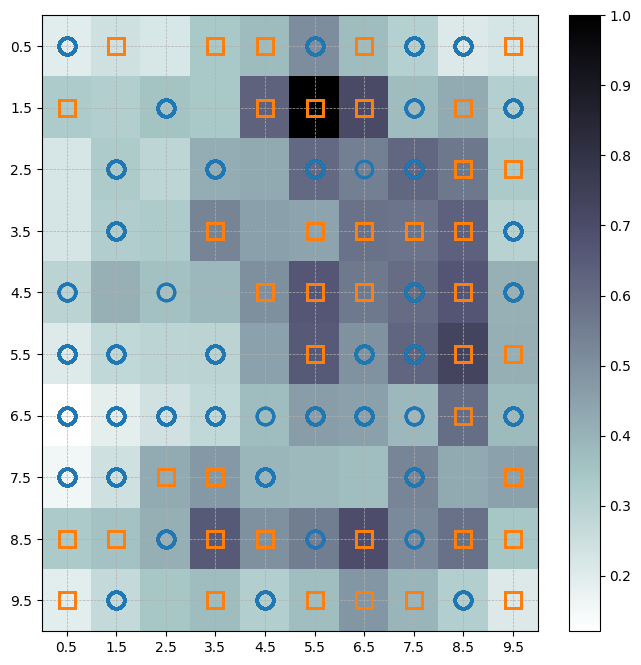

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

def plot_som(som, data, labels=None):
    plt.figure(figsize=(8, 8))
    plt.pcolor(som.distance_map().T, cmap='bone_r')

    if labels is not None:
        markers = ['o', 's']
        colors = ['C0', 'C1']
        for i, (x, l) in enumerate(zip(data, labels)):
            w = som.winner(x)
            # print(i, x, l)
            plt.plot(w[0] + 0.5, w[1] + 0.5, markers[l], markerfacecolor='None',
                     markeredgecolor=colors[l], markersize=12, markeredgewidth=2)

    plt.xticks(np.arange(0.5, som.get_weights().shape[0] + 0.5, 1))
    plt.yticks(np.arange(0.5, som.get_weights().shape[1] + 0.5, 1))
    plt.xlim([0, som.get_weights().shape[0]])
    plt.ylim([0, som.get_weights().shape[1]])
    plt.gca().invert_yaxis()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.colorbar()
    plt.show()

# Dataset de exemplo (substitua pelos seus próprios dados)
# data = np.array([
#     [1, 45, 0, 0, 1, 25.2, 6.7, 120, 1],
#     [0, 52, 1, 0, 0, 29.1, 7.2, 140, 1],
#     [1, 32, 0, 1, 0, 31.7, 5.9, 95, 0],
#     [0, 55, 1, 1, 1, 26.3, 7.8, 180, 1],
#     [0, 60, 1, 0, 0, 28.6, 7.0, 115, 0],
#     [1, 38, 0, 0, 1, 23.4, 6.2, 100, 0],
# ])

# Normalização dos dados
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data[:, :-1])

# Configurações do SOM
input_shape = normalized_data.shape[1]
output_shape = (10, 10)
num_epochs = 100

# Criação e treinamento do SOM
som = MiniSom(output_shape[0], output_shape[1], input_shape, sigma=1.0, learning_rate=0.5)
som.random_weights_init(normalized_data)
som.train_random(normalized_data, num_epochs)

# Plot do SOM antes da classificação
# plot_som(som, normalized_data)

labels_map = som.labels_map(normalized_data, data[:, -1])

# Classificação dos pacientes
predicted_labels = []
for sample in normalized_data:
    winner = som.winner(sample)
    predicted_label = int(dict(labels_map)[winner].most_common(1)[0][0]) # Pega a maior contagem de labels prescritos
    predicted_labels.append(predicted_label)

# Plot do SOM depois da classificação
plot_som(som, normalized_data, predicted_labels)


In [230]:
Counter(predicted_labels)

Counter({1: 9640, 0: 7860})

In [231]:
Counter(data[:, -1])

Counter({0.0: 9000, 1.0: 8500})

In [233]:
# Dados desbalanceados gerando muitos erros
Counter(predicted_labels == data[:, -1])

Counter({True: 14520, False: 2980})

In [234]:
14520 / (14520 + 2980) # Acuracia na mão pq sou pobre

0.8297142857142857

In [3]:
from minisom import MiniSom


In [20]:
import numpy as np
# Leitura dos dados do "new_diabetes.csv"
data = []
with open("data.txt", "r") as text:
    for line in text:
        data.append(list(map(float, line.replace("\n", "").split(","))))
data = np.array(data)
data = data[:, 1:]

In [42]:
import pandas as pd
df = pd.read_csv("new_diabetes.csv")

In [45]:
df['diabetes'].value_counts()

diabetes
0    34332
1     3904
Name: count, dtype: int64

In [46]:
# criando sample da classe não diabéticos
no = df[df["diabetes"] == 0.0].sample(6000)
# criando sample da classe diabéticos
yes = df[df["diabetes"] == 1.0]
# criando dataset para usar no som
data = pd.concat([no, yes])

In [47]:
data = data.to_numpy()
data = data[:, 1:]

In [48]:
target = data[:, -1]
label_names = {0:'nao_diab', 1:'diabe'}

In [49]:
data = data[:, :-1]

In [50]:
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [51]:
# Initialization and training
n_neurons = 10
m_neurons = 10
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=1.5, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(data)
som.train(data, 1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.309529740194647


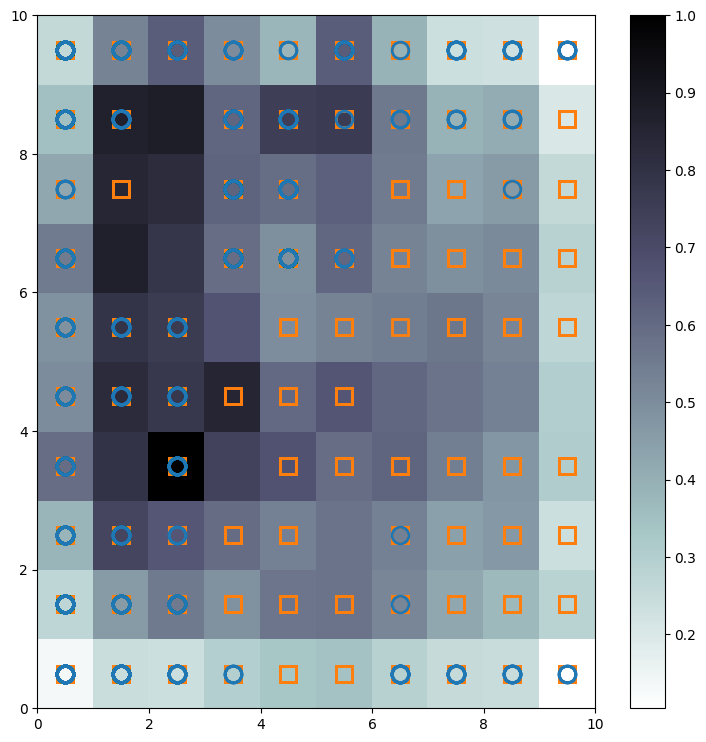

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[int(target[int(cnt)]-1)], markerfacecolor='None',
             markeredgecolor=colors[int(target[int(cnt)]-1)], markersize=12, markeredgewidth=2)

plt.show()

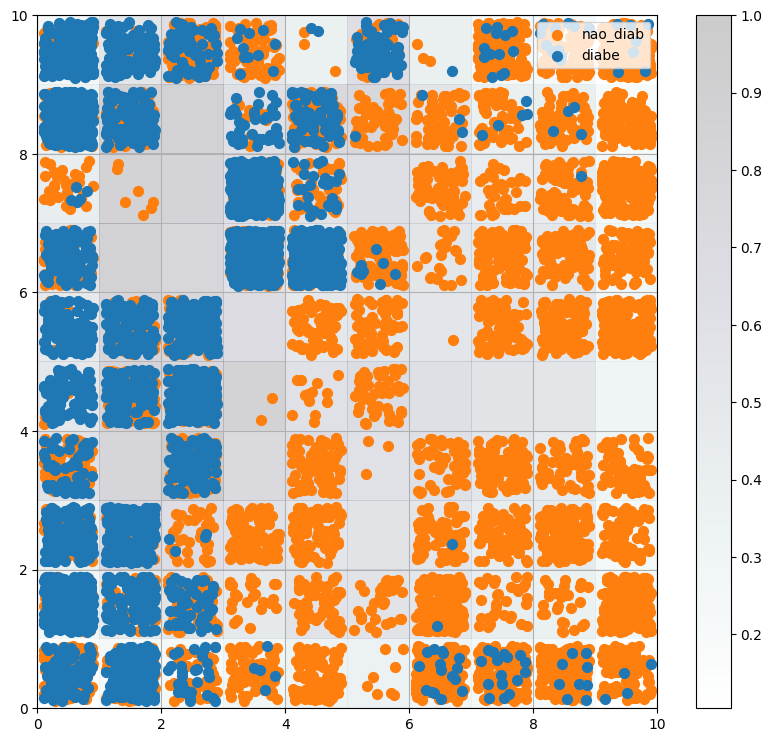

In [53]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[int(c)-1], label=label_names[int(c)])
plt.legend(loc='upper right')
plt.grid()
# plt.savefig('resulting_images/som_seed.png')
plt.show()

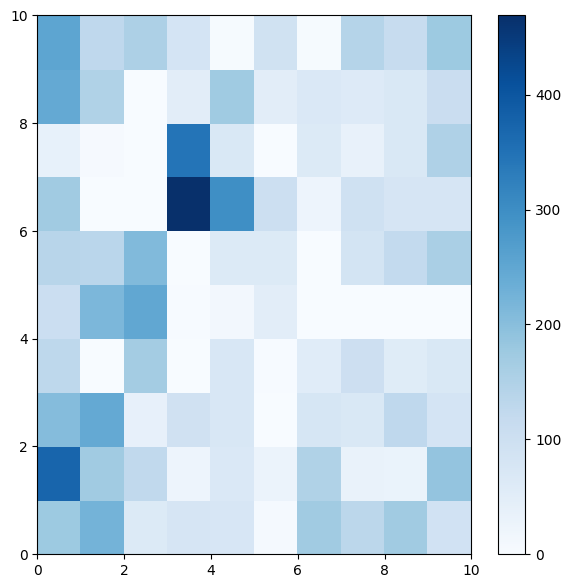

In [54]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

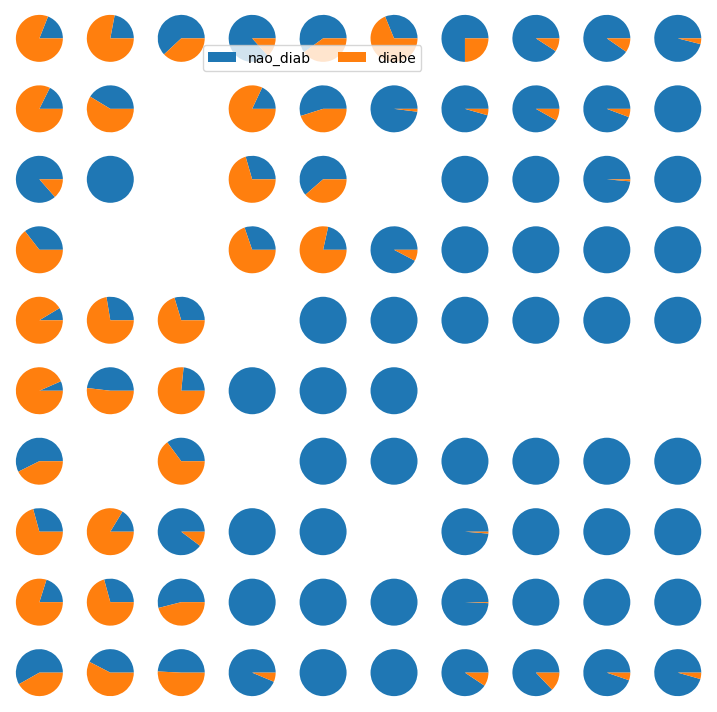

In [55]:
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(data, [label_names[t] for t in target])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)
# plt.savefig('resulting_images/som_seed_pies.png')
plt.show()